In [96]:
import pandas as pd
resourceDf = pd.read_json("../data/resource.json") 
applicationDf = pd.read_json("../data/application.json")
paDf = pd.read_json("../data/productApplication.json")
serverDf = pd.read_json("../data/server.json")

In [97]:
serverResourceDf = resourceDf[
    resourceDf["type"].isin(['server','legacy-server','legacy-physical-server'])]

total_resource_count = serverResourceDf.shape[0]
total_server_count =serverDf.shape[0]
serverResourceDf.shape

(134009, 10)

In [98]:
import json
defaultPA = json.loads(paDf[paDf["name"]=='default'].to_json())
default_pa_id = defaultPA['_id']['0']['$oid']
print(default_pa_id)

61d3cd987d7ab1f2dc6bab0d


In [99]:
pd.set_option('mode.chained_assignment',  None) 

applicationDf["parentGroup"] = applicationDf["parentGroup"].apply(lambda x : x['_id']['$oid'])
applicationDf["_id"] = applicationDf["_id"].apply(lambda x : x['$oid'])
serverResourceDf["parentGroups"]= serverResourceDf["parentGroups"].apply(lambda x : x[0]['_id']['$oid'])

In [100]:
lookupServerApplicationDf = pd.merge(left = serverResourceDf , right = applicationDf, left_on='parentGroups', right_on='_id', how = "left" ,suffixes=["_resource","_application"])

In [101]:
non_default_pa_server = lookupServerApplicationDf[lookupServerApplicationDf["parentGroup"] != default_pa_id]
non_default_pa_server.dropna(axis=0,how='any',subset=["parentGroup","parentGroups"],inplace = True)
registered_server_count= non_default_pa_server.shape[0]
print(registered_server_count)

75323


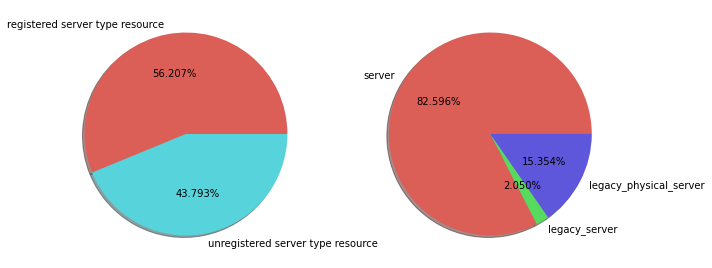

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
registered_server_count= non_default_pa_server.shape[0]
unregistered_server_count=total_resource_count-registered_server_count
values1 = [registered_server_count, unregistered_server_count]
labels1 = ["registered server type resource", "unregistered server type resource"]
colors1 = sns.color_palette('hls',len(labels))

plt.subplot(1,2,1)
result1 = plt.pie(values1,labels=labels1, autopct='%.3f%%', colors = colors1, shadow=True)

server_count = non_default_pa_server[non_default_pa_server["type"]=="server"].shape[0]
legacy_server_count= non_default_pa_server[non_default_pa_server["type"]=="legacy-server"].shape[0]
legacy_physical_server_count=non_default_pa_server[non_default_pa_server["type"]=="legacy-physical-server"].shape[0]

values2 = [server_count,legacy_server_count,legacy_physical_server_count ]
labels2 = ["server", "legacy_server", "legacy_physical_server"]
colors2 = sns.color_palette('hls',len(labels2))

plt.subplot(1,2,2)
result2 = plt.pie(values2,labels=labels2, autopct='%.3f%%', colors = colors2, shadow=True)

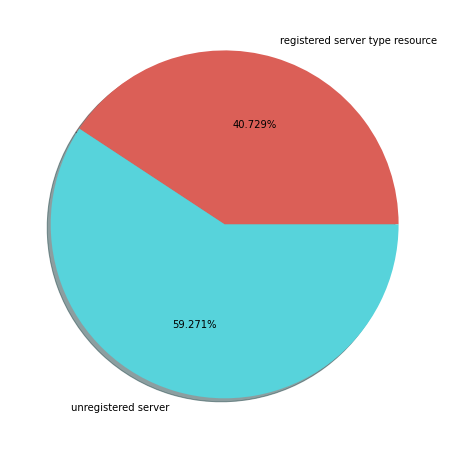

In [134]:
plt.figure(figsize=(10,8))

values3 = [registered_server_count, total_server_count-registered_server_count]
labels3 = ["registered server type resource", "unregistered server"]
colors3 = sns.color_palette('hls',len(labels))
result3 = plt.pie(values3,labels=labels3, autopct='%.3f%%', colors = colors3, shadow=True)

In [156]:
from datetime import datetime

def save_portion_and_count_frame(result, labels, values, path, prefix):
    percentages=[]
    for res in result[2]:
        percentages.append(res.get_text())
    portion_df = pd.DataFrame({'Target':labels, 'Portion': percentages,'Count': values})
    portion_df.
    portion_df.to_csv(path+prefix+"_"+str(datetime.now())+".csv")
    

path="./"
save_portion_and_count_frame(result1, labels1, values1, path, "registered server type resources on lai resource")
save_portion_and_count_frame(result2, labels2, values2, path, "registered resources per type")
save_portion_and_count_frame(result3, labels3, values3, path, "registered server type resources on servers")

In [167]:
test_df =pd.read_csv("registered resources per type_2022-08-08 16:06:40.819073.csv")
#test_df.set_index(keys=[test_df.columns[1]], drop = True)
test_df.head()

,Unnamed: 0,Target,Portion,Count
0,0,server,82.596%,62214
1,1,legacy_server,2.050%,1544
2,2,legacy_physical_server,15.354%,11565


In [157]:
! ls

registered resources per type_2022-08-08 16:06:40.819073.csv
registered server type resources on lai resource_2022-08-08 16:06:40.813933.csv
registered server type resources on servers_2022-08-08 16:06:40.821924.csv
resource_server_registration_rate.ipynb


In [123]:
! git add .
! git commit -m "server filtering"
! git push origin master

[master a2d42cd] server filtering
 1 file changed, 312 insertions(+), 272 deletions(-)
 rewrite resource_server_registration_rate.ipynb (90%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 10 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 48.42 KiB | 16.14 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/2jimoo/data_stastics
   56bb81d..a2d42cd  master -> master
